In [23]:
import pandas as pd
import numpy as np
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, plot_roc_curve
import matplotlib.pyplot as plt

In [16]:
data = pd.read_excel("../datasets/Customer churn/E Commerce Dataset.xlsx", sheet_name='E Comm')

In [17]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## 0. Basic cleaning

In [18]:
data.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [32]:
np.where(data.isna(), 1, 0)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
X = data.dropna().drop(axis=1, columns=['Churn'])
Y = data.dropna()['Churn']

In [35]:
categorical_features = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus', 'Gender']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_features)], remainder='passthrough')

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

## 1. Decision tree

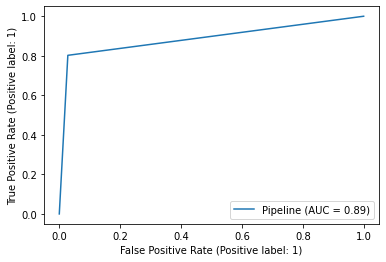

In [39]:
dt = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', tree.DecisionTreeClassifier())])
dt.fit(X_train, Y_train)
plot_roc_curve(dt, X_test, Y_test)

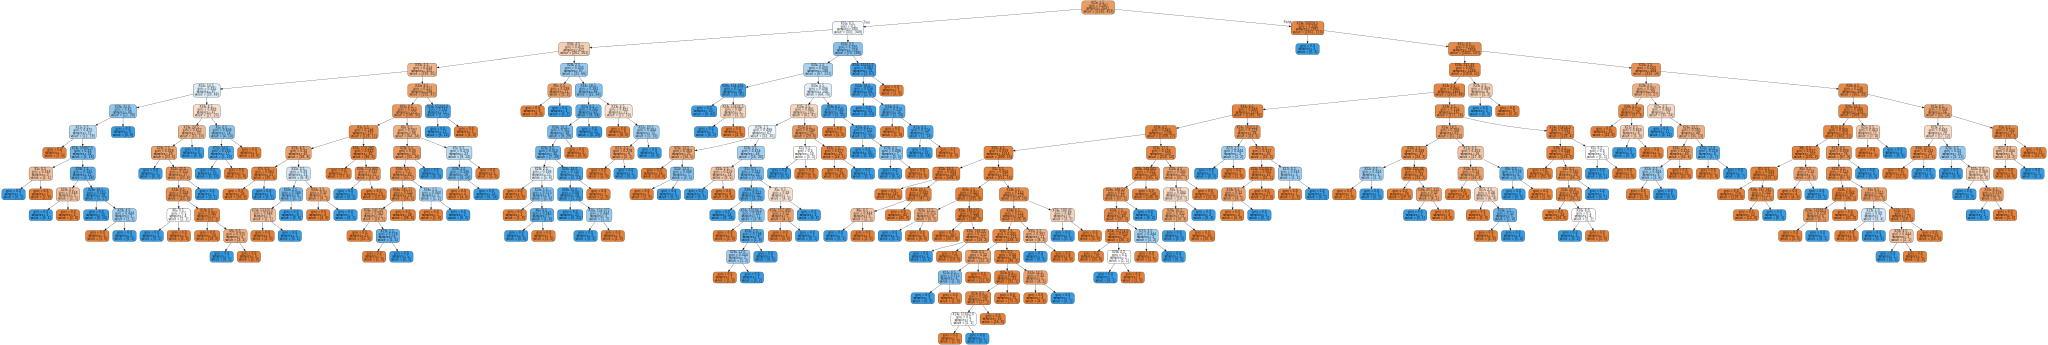

In [44]:
dot_data = tree.export_graphviz(dt.named_steps['classifier'],out_file=None, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## 2. SVM Linéaire

/home/rbury/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


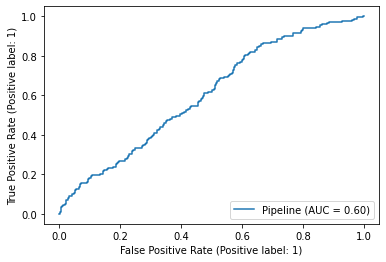

In [45]:
svmLinear = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', svm.LinearSVC())])
svmLinear.fit(X_train, Y_train)
plot_roc_curve(svmLinear, X_test, Y_test)

## 3. SVM avec d'autres Kernel

### RBF

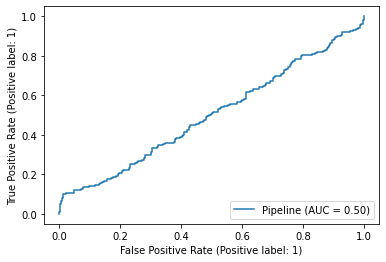

In [46]:
svmRBF = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', svm.SVC(kernel='rbf'))])
svmRBF.fit(X_train, Y_train)
plot_roc_curve(svmRBF, X_test, Y_test)

### Polynomial

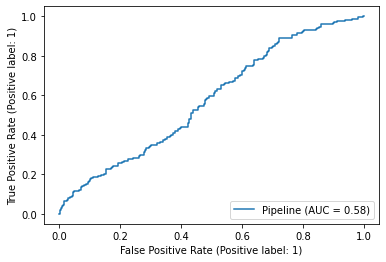

In [47]:
svmPoly = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', svm.SVC(kernel='poly'))])
svmPoly.fit(X_train, Y_train)
plot_roc_curve(svmPoly, X_test, Y_test)

## 4. Neural Network

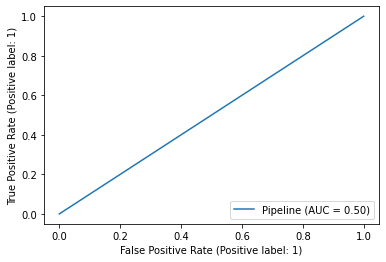

In [50]:
from sklearn.neural_network import MLPClassifier
nnc = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2,2), random_state=1))])
nnc.fit(X_train, Y_train)
plot_roc_curve(nnc, X_test, Y_test)

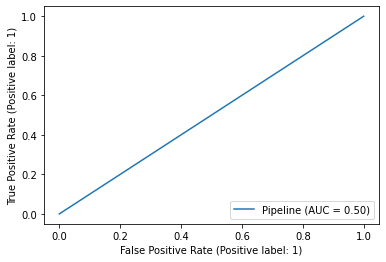

In [64]:
nnc = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 10, 5, 1), random_state=3))])
nnc.fit(X_train, Y_train)
plot_roc_curve(nnc, X_test, Y_test)